<a href="https://colab.research.google.com/github/amckn005/projects/blob/main/Project_Assignment_2_CS_624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 - Machine Learning Model Pipeline: Mushroom Dataset



## Problem Statement:
Given the provided dataset consisting of 22 features describing various attributes of mushrooms, we aim to identify the most accurate predictive models for determining whether a mushroom is poisonous or edible.

## Dataset Introduction

Source gathered from UCI Machine Learning Repository where the data comes from Audobon Society Field Guide

### Target class: poisonous or edible
### Features:
cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

bruises?: bruises=t, no=f

odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

gill-attachment: attached=a, descending=d, free=f, notched=n

gill-spacing: close=c, crowded=w, distant=d

gill-size: broad=b, narrow=n

gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

stalk-shape: enlarging=e, tapering=t

stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

veil-type: partial=p, universal=u

veil-color: brown=n, orange=o, white=w, yellow=y

ring-number: none=n, one=o, two=t

ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d










### Load the Mushroom Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns

In [ ]:
# Display raw data

pd.set_option('display.max_columns', None)
results = pd.read_csv("/content/agaricus-lepiota.data", header=None)
results

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


### Initial Data Analysis

In [ ]:
# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(results)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Set new column headers

df.set_axis(
[
    'target',
    'cap-shape',
    'cap-surface',
    'cap-color',
    'bruises',
    'odor',
    'gill-attachment',
    'gill-spacing',
    'gill-size',
    'gill-color',
    'stalk-shape',
    'stalk-root',
    'stalk-surface-above-ring',
    'stalk-surface-below-ring',
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-type',
    'veil-color',
    'ring-number',
    'ring-type',
    'spore-print-color',
    'population',
    'habitat'
]
             , axis='columns', inplace=True)

df.head()

<ipython-input-4-34e261da563f>:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(


,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Initial Examination
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   target                    8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# Check for missing values in the dataset
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 target                      0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
# All categorical data, summary statistics dont apply yet
df.describe()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
# Check unique values in each column
print("\nUnique Values in Each Column:")
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")


Unique Values in Each Column:
target: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


We have a target column which classifies the mushrooms as poisonous(p) or edible(e). The other 22 features are also string values.

Additionally, the "veil-type" has only one unique value "p", thus we should get rid of it.

In [ ]:
# Dropping "veil-type" column.
df.drop("veil-type",axis=1,inplace=True)

In [ ]:
# Count unique values in each feature column
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"\nValue counts for {column}:\n{value_counts}")


Value counts for target:
e    4208
p    3916
Name: target, dtype: int64

Value counts for cap-shape:
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

Value counts for cap-surface:
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

Value counts for cap-color:
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

Value counts for bruises:
f    4748
t    3376
Name: bruises, dtype: int64

Value counts for odor:
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

Value counts for gill-attachment:
f    7914
a     210
Name: gill-attachment, dtype: int64

Value counts for gill-spacing:
c    6812
w    1312
Name: gill-spacing, dtype: int64

Value counts for gill-size:
b    5612
n    2512
Name: gill-size, dtype: int64

Value counts for gill-color:
b    1728
p    1492
w    1202
n    1048
g     7

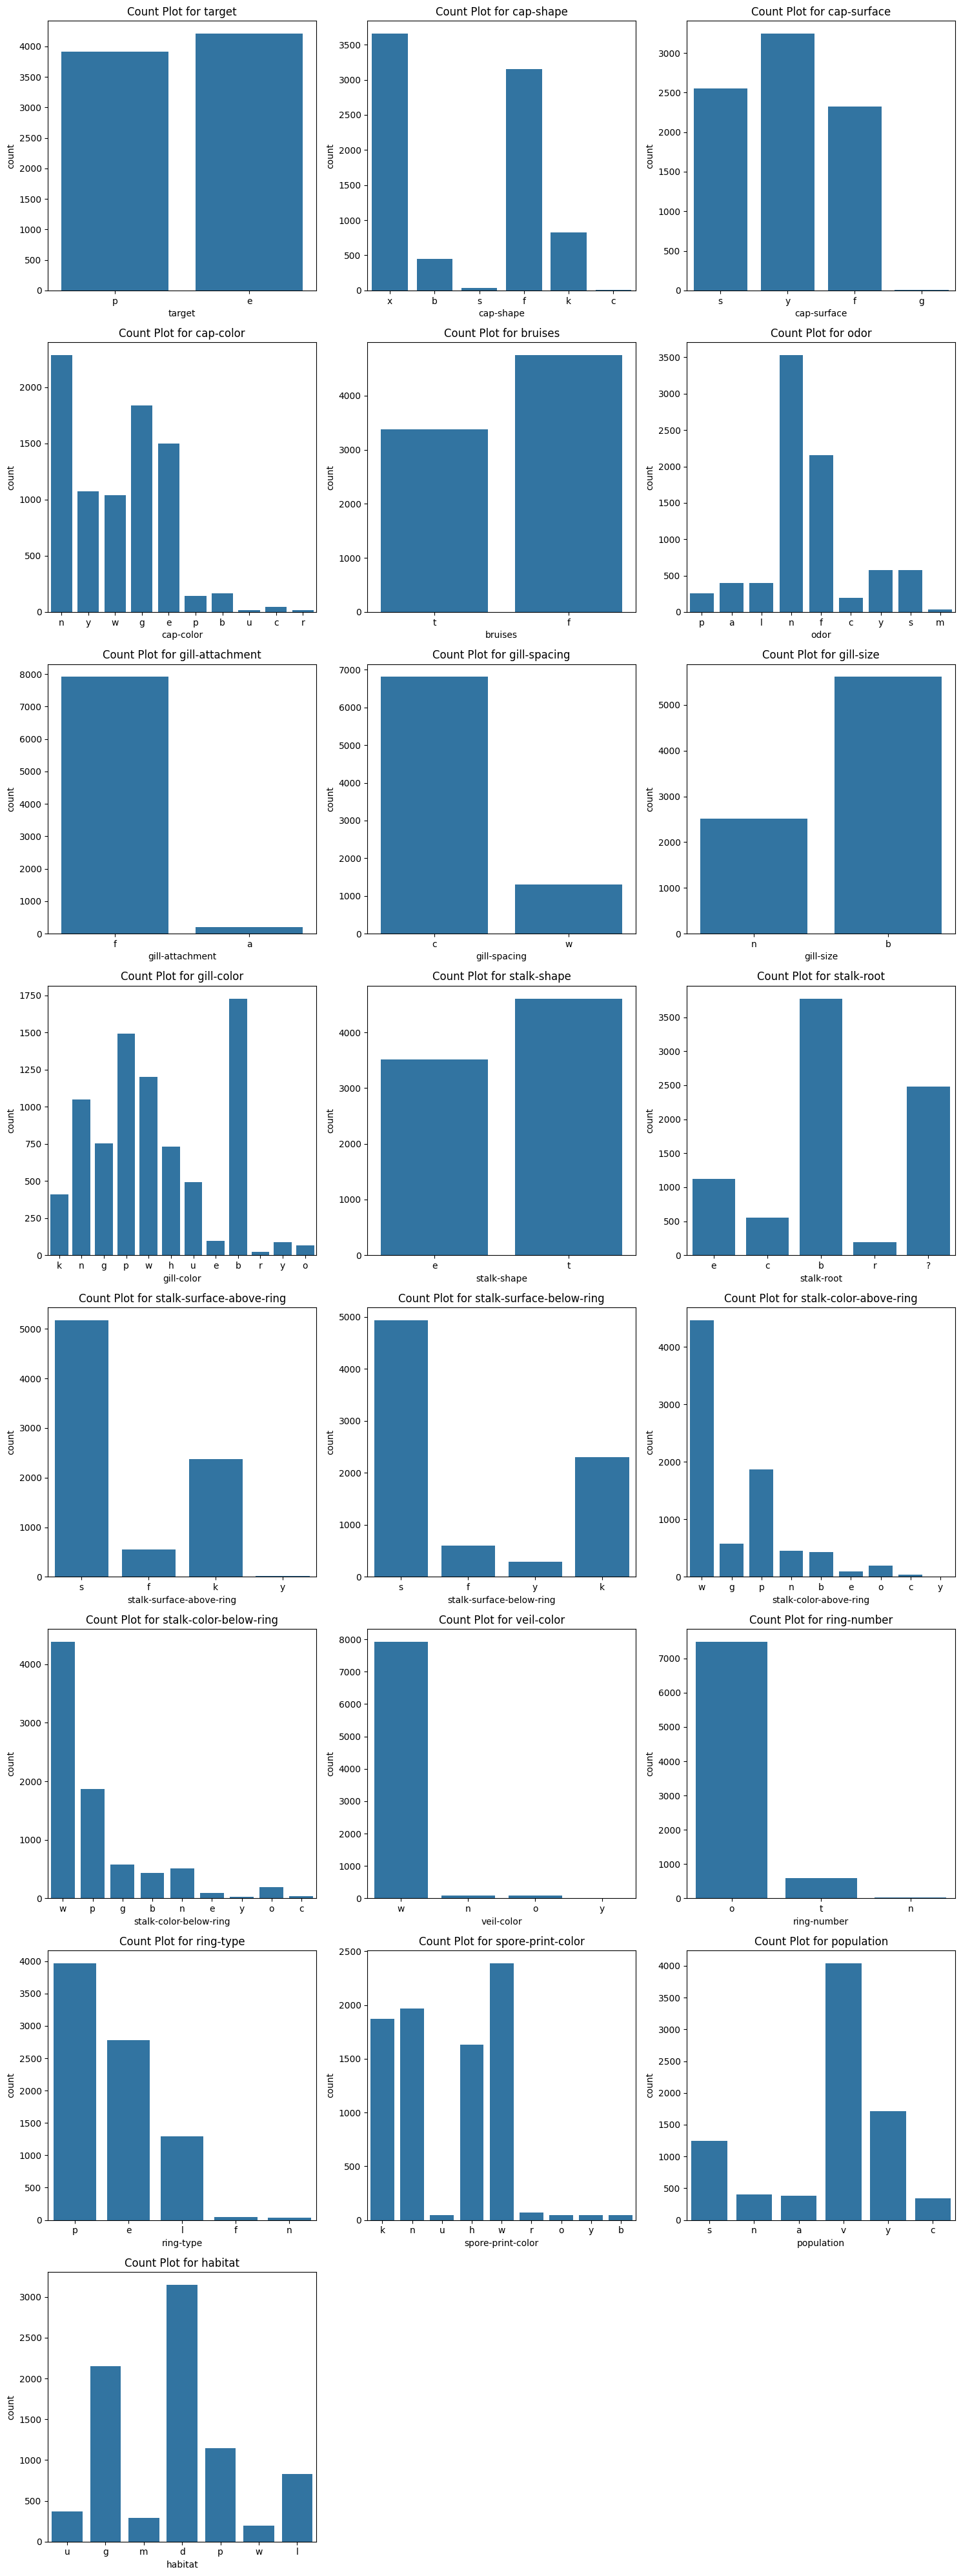

In [ ]:
# Display count plots for the target and each feature

# Get the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of rows and columns for subplots
num_plots = len(categorical_columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots - 1) // num_cols + 1  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes if necessary
if num_rows == 1:
    axes = axes.reshape(1, -1)
else:
    axes = axes.flatten()

# Plot count plots for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Count Plot for {column}")

# Remove any unused subplots
for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

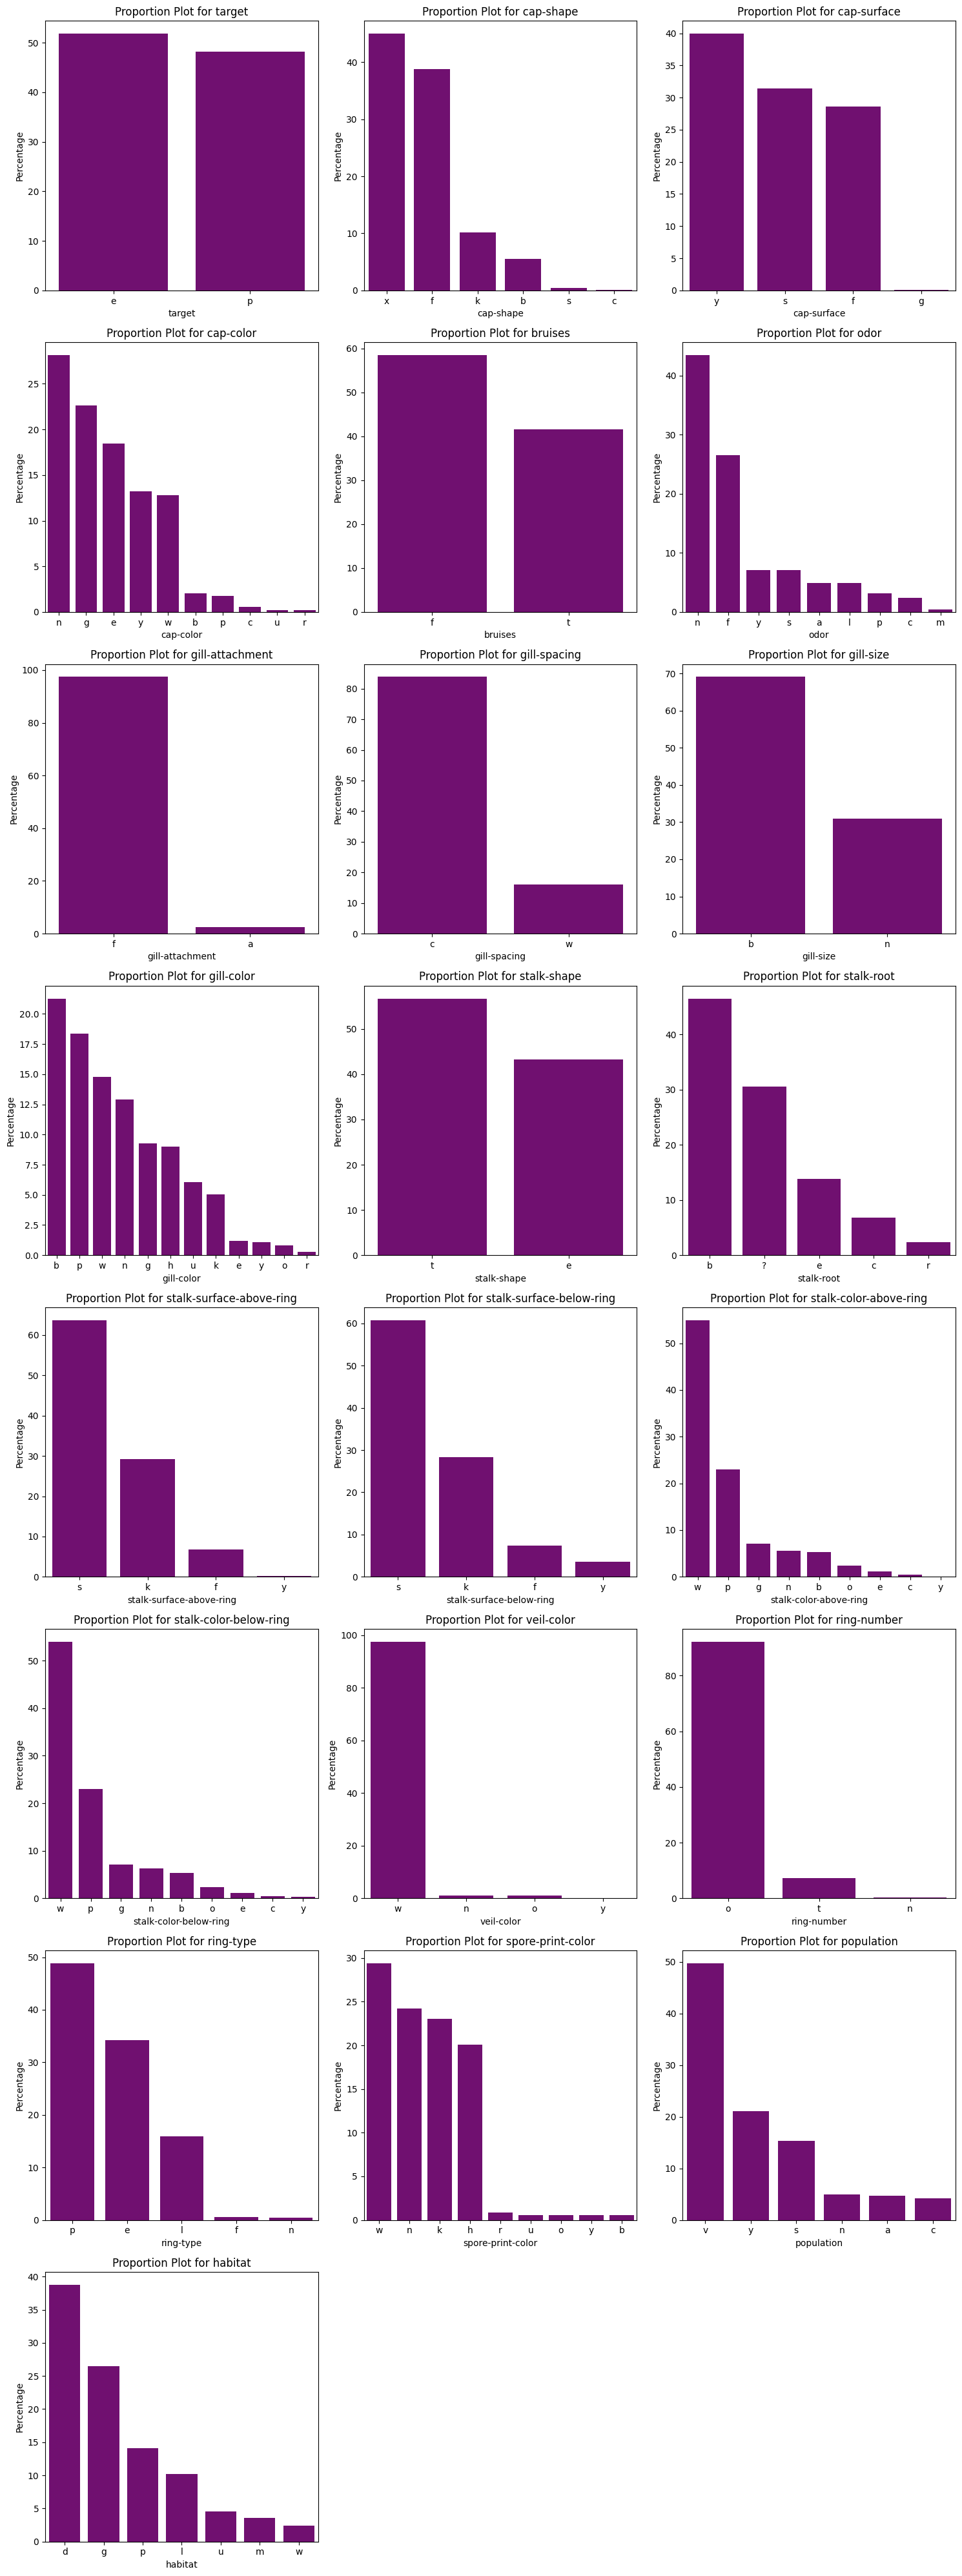

In [ ]:
# Display proportion plots for the target and each feature

# Get the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of rows and columns for subplots
num_plots = len(categorical_columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots - 1) // num_cols + 1  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes if necessary
if num_rows == 1:
    axes = axes.reshape(1, -1)
else:
    axes = axes.flatten()

# Plot proportion plots for each categorical column
for i, column in enumerate(categorical_columns):
    # Calculate proportions
    proportions = df[column].value_counts(normalize=True)

    # Plot a bar plot with percentages and specify color
    sns.barplot(x=proportions.index, y=proportions * 100, ax=axes[i], color='purple')
    axes[i].set_title(f"Proportion Plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Percentage')

# Remove any unused subplots
for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### Clean the dataset

In [ ]:
# Handling duplicates
initial_row_count = len(df)
df_wine = df.drop_duplicates()
final_row_count = len(df)
print(f"Removed {initial_row_count - final_row_count} duplicate rows")
print(f"After cleaning, the dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Removed 0 duplicate rows
After cleaning, the dataset has 8124 rows and 22 columns.


### Check Class Imbalance

In [ ]:
df['target'].value_counts()

e    4208
p    3916
Name: target, dtype: int64

<ipython-input-15-d0ce11610030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df,  palette=color)


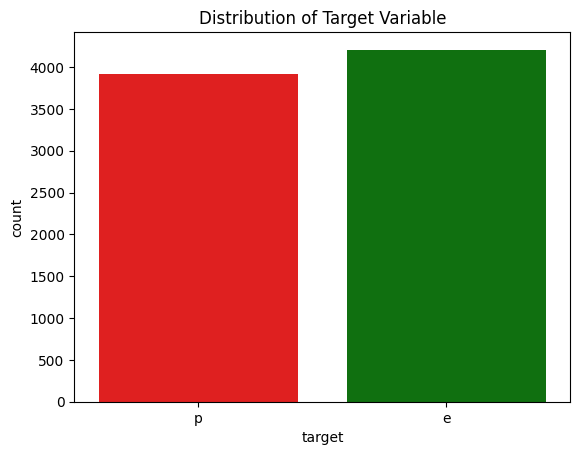

In [ ]:
# Count plot for the target variable to visualize the distribution of classes
color = ['red', 'green']
sns.countplot(x='target', data=df,  palette=color)
plt.title('Distribution of Target Variable')
plt.show()

The classes are relatively balanced.

### Feature Engineering: Label encoding

In [ ]:
# Splitting the dataset into features and target variable
X = df.drop(['target'], axis=1)
y = df["target"]

X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g


In [ ]:
# use LabelEncoder to convert data to ordinal

from sklearn.preprocessing import LabelEncoder

labelencoder_y=LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
labelencoder_x=LabelEncoder()
for column in X.columns:
    X[column] = labelencoder_x.fit_transform(X[column])
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


### Fix class imbalance using SMOTE

New class distribution after SMOTE: {0: 2951, 1: 2951}


<ipython-input-19-592169453e70>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_smote, palette='Set1')


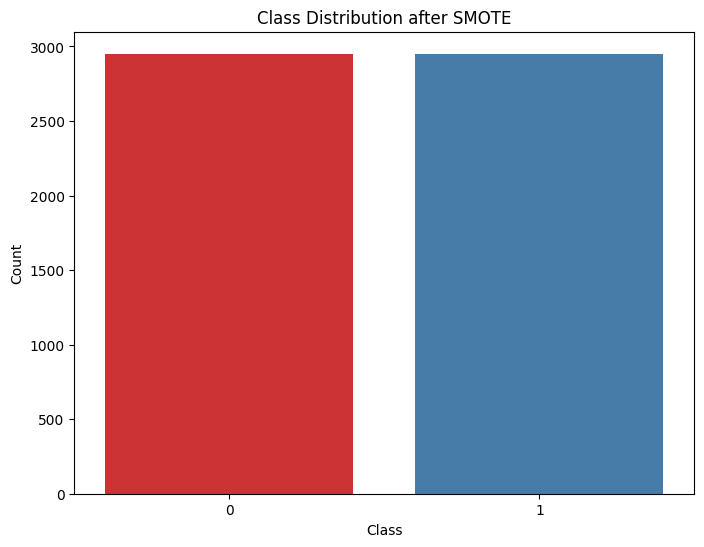

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np

# Splitting the data into training and testing sets to apply SMOTE only on training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Summarize the new class distribution after SMOTE
unique, counts = np.unique(y_smote, return_counts=True)
new_distribution = dict(zip(unique, counts))
print("New class distribution after SMOTE:", new_distribution)

# Visualize the new class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_smote, palette='Set1')
plt.title('Class Distribution after SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Normalization

In [ ]:
# Normalize data after balancing

from sklearn.preprocessing import MinMaxScaler

# Assuming X_smote is your feature set after applying SMOTE

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_smote_normalized = scaler.fit_transform(X_smote)

# Convert the normalized data back to a DataFrame if needed
X_smote_normalized_df = pd.DataFrame(X_smote_normalized, columns=X_smote.columns)

# Now X_smote_normalized contains the normalized feature set
X_smote_normalized_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,0.666667,0.000000,1.0,0.250,1.0,0.0,0.0,0.272727,1.0,0.25,0.666667,0.000000,0.875,0.875,0.666667,0.5,1.0,0.125,0.8,0.833333
1,1.0,0.000000,0.333333,1.0,0.625,1.0,0.0,0.0,0.636364,1.0,0.25,0.666667,0.666667,0.750,0.875,0.666667,0.5,1.0,0.250,1.0,0.000000
2,1.0,0.000000,0.333333,0.0,0.250,1.0,0.0,0.0,0.636364,0.0,0.25,0.333333,0.333333,0.500,0.000,0.666667,0.5,0.5,0.125,0.8,0.000000
3,1.0,1.000000,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,0.0,0.50,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.4,0.166667
4,1.0,1.000000,0.444444,0.0,1.000,1.0,0.0,1.0,0.000000,1.0,0.00,0.333333,0.333333,0.875,0.750,0.666667,0.5,0.0,0.875,0.8,0.000000


In [ ]:
X_smote_normalized_df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,0.671162,0.611488,0.499661,0.406642,0.517282,0.973399,0.153507,0.316333,0.431287,0.569129,0.269485,0.521744,0.531232,0.723484,0.722065,0.655145,0.533802,0.563453,0.453872,0.731311,0.252993
std,0.317877,0.408289,0.283327,0.491249,0.264258,0.160928,0.360506,0.465084,0.324671,0.495240,0.260846,0.206577,0.224960,0.240655,0.240412,0.082211,0.136536,0.450242,0.300892,0.248975,0.287258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.333333,0.000000,0.250000,1.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.333333,0.333333,0.750000,0.750000,0.666667,0.500000,0.000000,0.250000,0.600000,0.000000
50%,0.600000,0.666667,0.444444,0.000000,0.625000,1.000000,0.000000,0.000000,0.454545,1.000000,0.250000,0.666667,0.666667,0.875000,0.875000,0.666667,0.500000,0.500000,0.375000,0.800000,0.166667
75%,1.000000,1.000000,0.888889,1.000000,0.625000,1.000000,0.000000,1.000000,0.636364,1.000000,0.250000,0.666667,0.666667,0.875000,0.875000,0.666667,0.500000,1.000000,0.875000,0.800000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 [Text(0, 0.5, 'cap-shape'),
  Text(0, 1.5, 'cap-surface'),
  Text(0, 2.5, 'cap-color'),
  Text(0, 3.5, 'bruises'),
  Text(0, 4.5, 'odor'),
  Text(0, 5.5, 'gill-attachment'),
  Text(0, 6.5, 'gill-spacing'),
  Text(0, 7.5, 'gill-size'),
  Text(0, 8.5, 'gill-color'),
  Text(0, 9.5, 'stalk-shape'),
  Text(0, 10.5, 'stalk-root'),
  Text(0, 11.5, 'stalk-surface-above-ring'),
  Text(0, 12.5, 'stalk-surface-below-ring'),
  Text(0, 13.5, 'stalk-color-above-ring'),
  Text(0, 14.5, 'stalk-color-below-ring'),
  Text(0, 15.5, 'veil-color'),
  Text(0, 16.5, 'ring-number'),
  Text(0, 17.5, 'ring-type'),
  Text(0, 18.5, 'spore-print-color'),
  Text(0, 19.5, 'population'),
  Text(0, 20.5, 'habitat')])

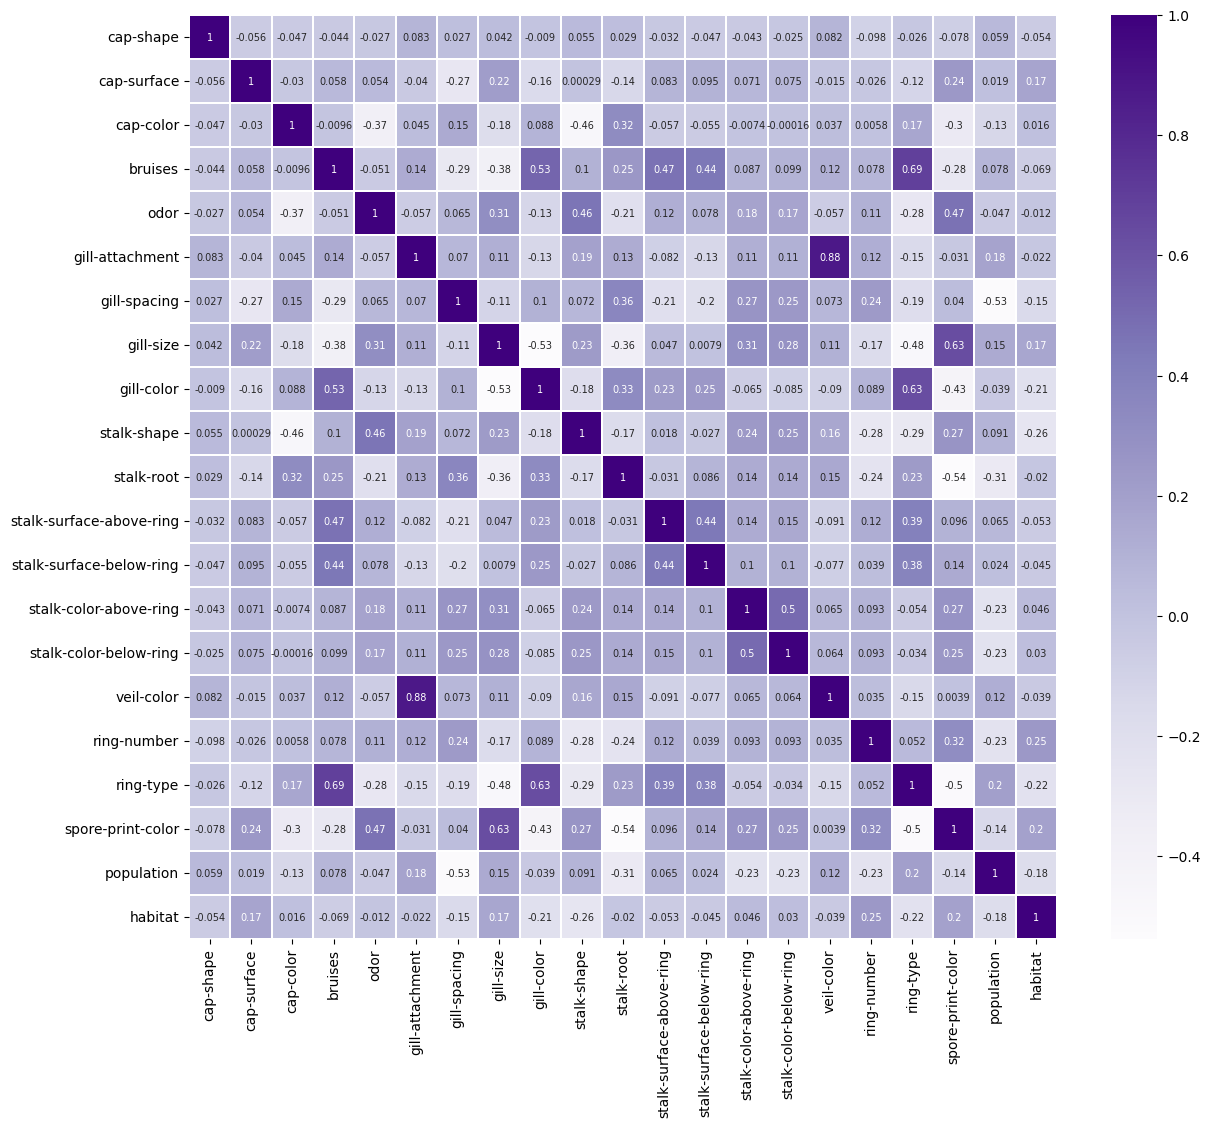

In [ ]:
# correlation between the variables after normalizing

plt.figure(figsize=(14,12))
sns.heatmap(X_smote_normalized_df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0)


<ipython-input-23-2b78798553ec>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(rotation=90, labels=list(X_smote_normalized_df.columns))


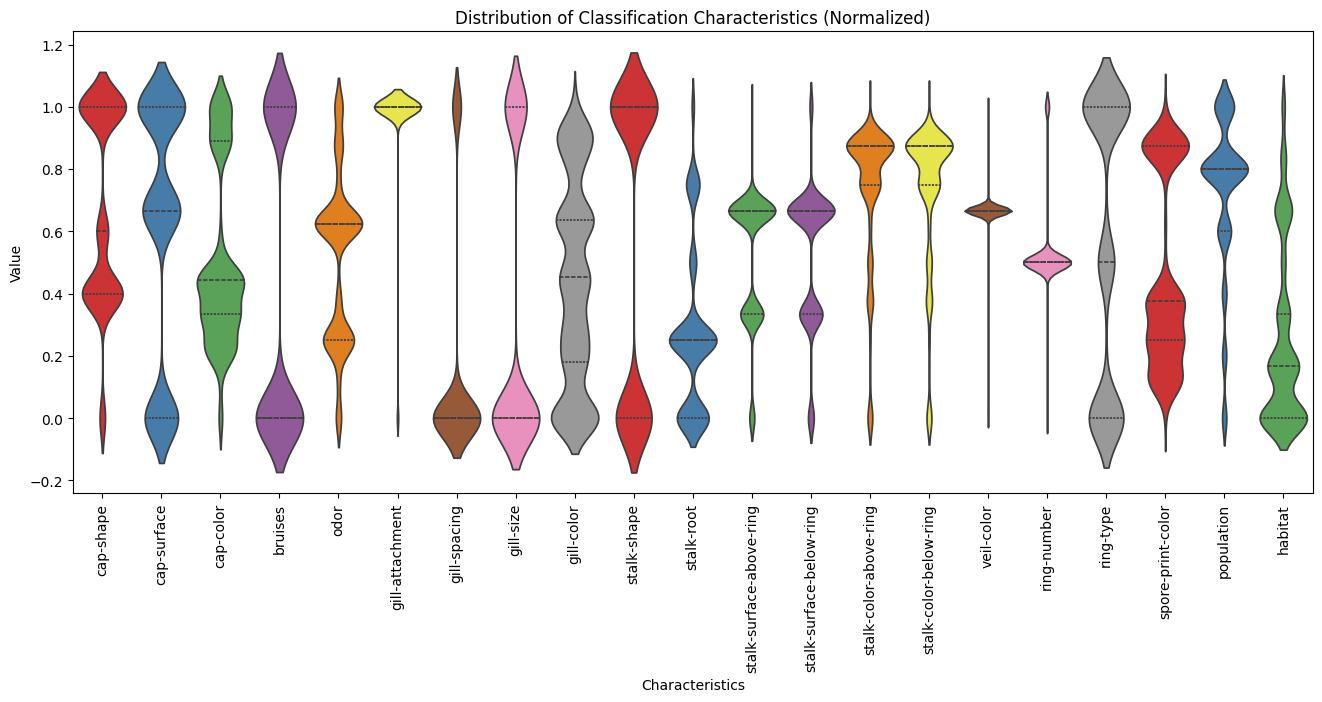

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Violin plot without the 'class' category
fig, ax = plt.subplots(figsize=(16, 6))
p = sns.violinplot(ax=ax, data=X_smote_normalized_df, inner='quartile', palette='Set1')
p.set_xticklabels(rotation=90, labels=list(X_smote_normalized_df.columns))
plt.title('Distribution of Classification Characteristics (Normalized)')
plt.xlabel('Characteristics')
plt.ylabel('Value')
plt.show()

### Apply PCA

In [ ]:
from sklearn.decomposition import PCA

# Let's say, components = 2
n_components = 2  # Define the number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_smote_normalized_df)
print("Original shape:", X_smote_normalized_df.shape)
print('Shape of PCA data:', X_train_pca.shape)

# Create the dataframe
df_pca1 = pd.DataFrame(X_train_pca,
                       columns=['PC{}'.format(i + 1)
                                for i in range(n_components)])
print(df_pca1)

Original shape: (5902, 21)
Shape of PCA data: (5902, 2)
           PC1       PC2
0    -0.469321 -0.575099
1    -0.716022 -0.681042
2    -0.330773  0.893293
3    -0.940226  0.179160
4     1.310353 -0.363219
...        ...       ...
5897  1.167088 -0.280062
5898  1.156933 -0.164388
5899  1.263542 -0.411209
5900  1.274703 -0.425370
5901  1.347413 -0.384706

[5902 rows x 2 columns]


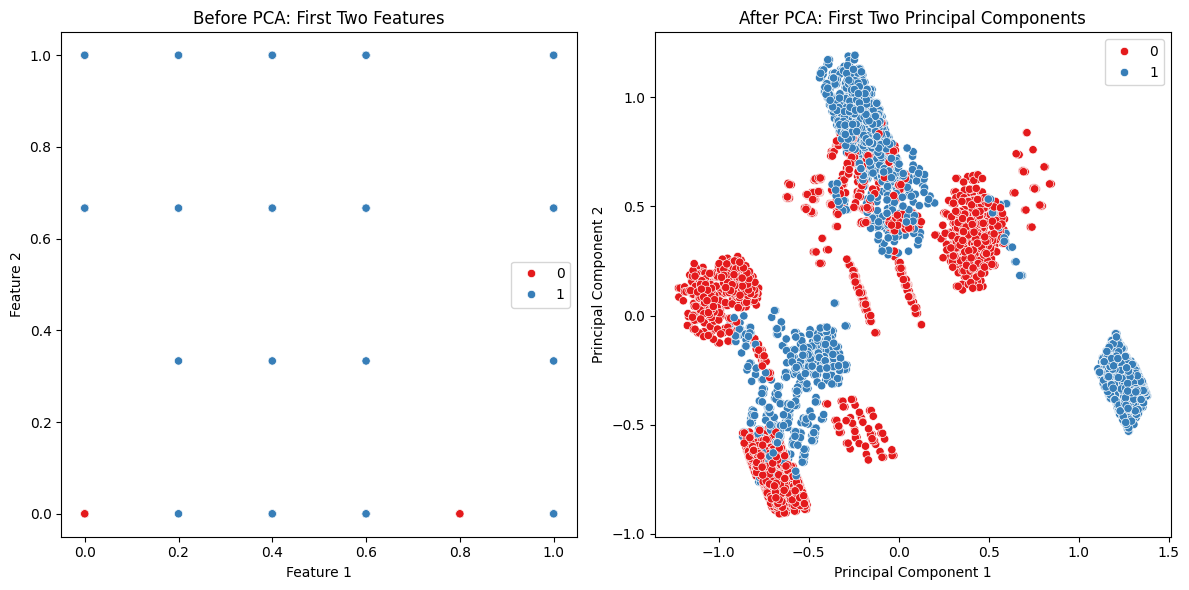

In [ ]:
# Visualization before PCA (using the first two features)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_smote_normalized_df.iloc[:, 0], y=X_smote_normalized_df.iloc[:, 1], hue=y_smote, palette='Set1')
plt.title('Before PCA: First Two Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


# Visualization after PCA
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_smote, palette='Set1')
plt.title('After PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

Decided against using PCA dataframe

### Prepare Kfold cross validation dataset

In [ ]:
from sklearn.model_selection import KFold
import pandas as pd

# Number of splits for K-Fold cross-validation
n_splits = 5

# Initialize the KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Convert X_smote_normalized_df and y_smote to pandas DataFrames if they are not already
X_smote_normalized_df = pd.DataFrame(X_smote_normalized_df)
y_smote = pd.Series(y_smote)

# Prepare the cross-validation datasets
fold = 0
for train_index, test_index in kf.split(X_smote_normalized_df):
    fold += 1
    X_train_cv, X_test_cv = X_smote_normalized_df.iloc[train_index], X_smote_normalized_df.iloc[test_index]
    y_train_cv, y_test_cv = y_smote.iloc[train_index], y_smote.iloc[test_index]

    # Summary for each fold
    print(f"Fold {fold}:")
    print(f"Training set: {len(train_index)} samples")
    print(f"Validation set: {len(test_index)} samples\n")

# Summary of K-Fold cross-validation setup
print(f"K-Fold Cross-Validation setup with {n_splits} folds.")

Fold 1:
Training set: 4721 samples
Validation set: 1181 samples

Fold 2:
Training set: 4721 samples
Validation set: 1181 samples

Fold 3:
Training set: 4722 samples
Validation set: 1180 samples

Fold 4:
Training set: 4722 samples
Validation set: 1180 samples

Fold 5:
Training set: 4722 samples
Validation set: 1180 samples

K-Fold Cross-Validation setup with 5 folds.


### Selecting models to train

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

### Perform Cross validation training

In [ ]:
# Assuming X_train_cv, X_test_cv, y_train_cv, y_test_cv are your cross-validated datasets

model_scores = {}

for name, model in models.items():
    # Cross-validated score
    scores = cross_val_score(model, X_train_cv, y_train_cv, cv=5, scoring='accuracy')
    model_scores[name] = scores.mean()
    print(f"{name} Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

Logistic Regression Accuracy: 0.9454 (+/- 0.0132)
Decision Tree Accuracy: 1.0000 (+/- 0.0000)
Random Forest Accuracy: 1.0000 (+/- 0.0000)
SVM Accuracy: 0.9994 (+/- 0.0025)
KNN Accuracy: 0.9989 (+/- 0.0023)


# Accuracy of different models with cross validation dataset

## Logistic Regression Classification

In [ ]:
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train_cv, y_train_cv)
print("Test Accuracy: {}%".format(round(lr.score(X_test_cv, y_test_cv)*100,2)))

Test Accuracy: 94.49%


In [ ]:
from sklearn.metrics import classification_report

y_pred_lr = lr.predict(X_test_cv)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test_cv, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.92      0.97      0.95       578
           1       0.97      0.92      0.94       602

    accuracy                           0.94      1180
   macro avg       0.95      0.95      0.94      1180
weighted avg       0.95      0.94      0.94      1180



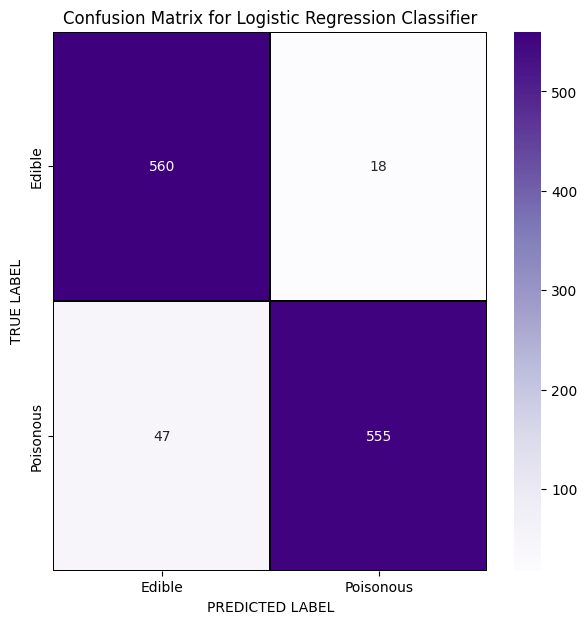

In [ ]:
from sklearn.metrics import confusion_matrix

cml = confusion_matrix(y_test_cv, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cml, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

## Decision Tree Classification

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_cv, y_train_cv)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(X_test_cv)
print("Decision Tree Classifier report: \n\n", classification_report(y_test_cv, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test_cv, y_test_cv)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00       602

    accuracy                           1.00      1180
   macro avg       1.00      1.00      1.00      1180
weighted avg       1.00      1.00      1.00      1180

Test Accuracy: 100.0%


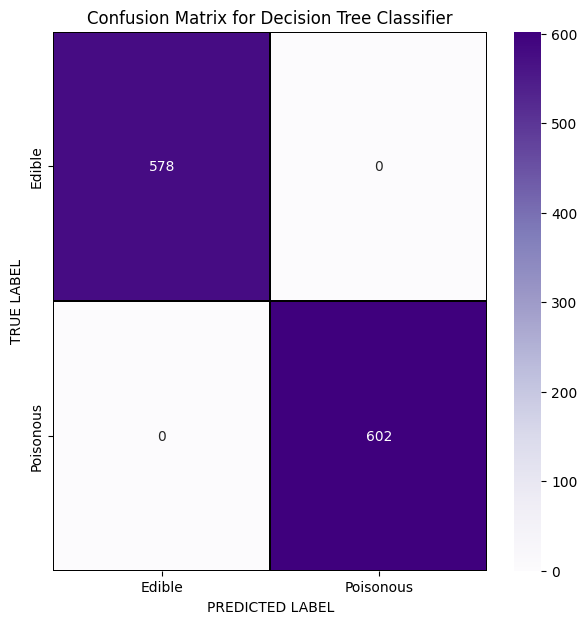

In [ ]:
from sklearn.metrics import confusion_matrix

cmd = confusion_matrix(y_test_cv, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cmd, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
preds = dt.predict(X_test_cv)
print(preds[:36])
print(y_test_cv[:36].values)

# 0 - Edible
# 1 - Poisonous

[0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0]
[0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0]


## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_cv, y_train_cv)
print("Test Accuracy: {}%".format(round(rf.score(X_test_cv, y_test_cv)*100, 2)))

Test Accuracy: 100.0%


In [ ]:
y_pred_rf = rf.predict(X_test_cv)
print("Random Forest Classifier report: \n\n", classification_report(y_test_cv, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00       602

    accuracy                           1.00      1180
   macro avg       1.00      1.00      1.00      1180
weighted avg       1.00      1.00      1.00      1180



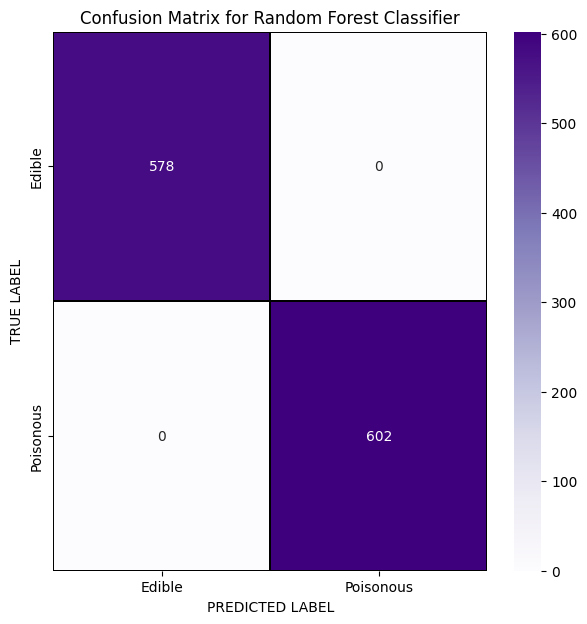

In [ ]:
cmr = confusion_matrix(y_test_cv, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cmr, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

## SVM

In [ ]:
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train_cv, y_train_cv)
print("Test Accuracy: {}%".format(svm.score(X_test_cv, y_test_cv)*100, 2))

Test Accuracy: 96.61016949152543%


In [ ]:
y_pred_svm = svm.predict(X_test_cv)
print("SVM Classifier report: \n\n", classification_report(y_test_cv, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.97      0.97       578
           1       0.97      0.96      0.97       602

    accuracy                           0.97      1180
   macro avg       0.97      0.97      0.97      1180
weighted avg       0.97      0.97      0.97      1180



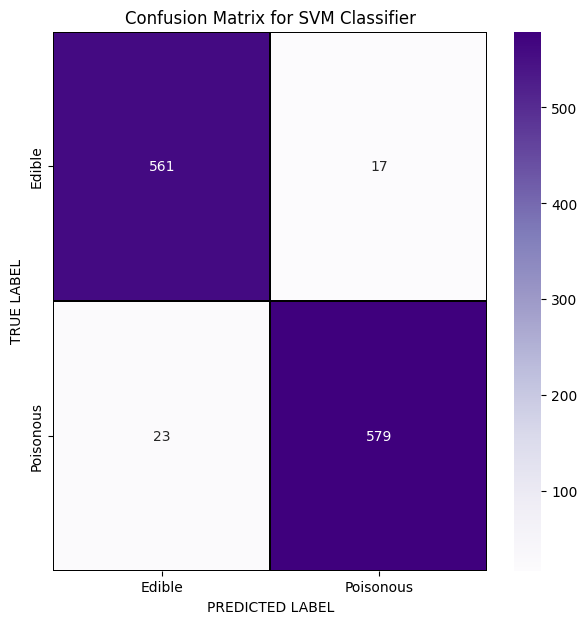

In [ ]:
cms = confusion_matrix(y_test_cv, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cms, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

## KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_cv,y_train_cv)
print("Test Accuracy: {}%".format(knn.score(X_test_cv, y_test_cv)*100, 2))

Test Accuracy: 100.0%


In [ ]:
y_pred_knn = knn.predict(X_test_cv)
print("KNN Classifier report: \n\n", classification_report(y_test_cv, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00       602

    accuracy                           1.00      1180
   macro avg       1.00      1.00      1.00      1180
weighted avg       1.00      1.00      1.00      1180



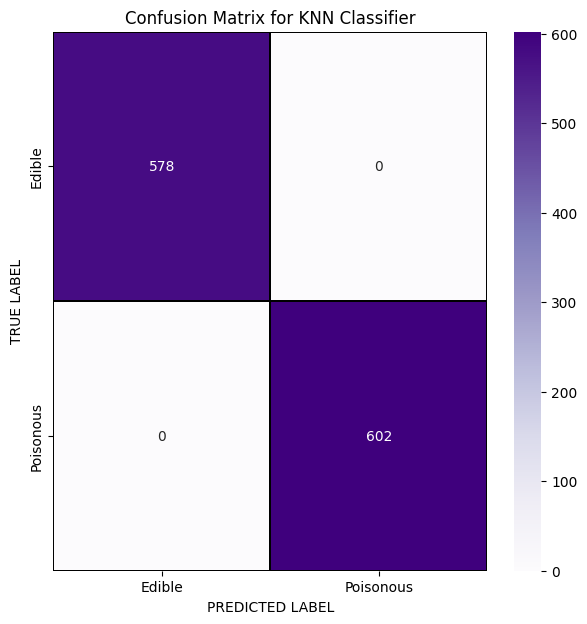

In [ ]:
cmk = confusion_matrix(y_test_cv, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cmk, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()